# High Value Customers Identification (Insiders) #
**By: Marx Cerqueira**

DESCRIPTION
Background of Problem Statement:
A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017).

The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves.
There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups:

Project Planing IOT

** Input**

**Ciclo 0**: Planejamento - Método IOT


**Ciclo 1**: Métricas de Validação de Clusters

    1. Feature Engineering
        - RecênciaFrequênciaMonetização

    2. Métricas de validação de Clustering
        - WSS ( Within-Cluster Sum of Square )  SS ( Silhouette Score )

    3. Cluster Analysis
        - Plot 3DCluster Profile
        
**Ciclo 2**: Análise de Silhouettes

    1. Feature Engineering
        - Average Ticket

    2. Análise de Silhouette
        - Silhouette Analysis

    3. Cluster Visualization
        - UMAP
        
    4. Cluster Análise de Perfil
        -Descrição dos centróides dos clusters

**Ciclo 3**: Statistical Descriptive

    1. Análise Descritiva
        - Atributos numéricosAtributos categóricos

    2. Feature Engineering
        - Average RecencyNumber of Returns

    3. Data preparation
        - Standard Scaler

## Project Solution Planning

### Input

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para integrar um programa de fidelização
2. Conjunto de dados
    - Vendas de um ecommerce, durante um período de um ano

### Output


1. Indicação das pessoas que farão parte do programa de fidelização (insiders)
    - Lista: client_id > Is insider
             11321     > yes/1
             14332     > no/1
             
2. Relatório com as respostas das perguntas de negócio

    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks

1. Quem são as pessoas elegíveis para participar do programa de Insiders ? 
    - O que é ser elegível? O que são clientes de maior "valor"?
    - Faturamento: ** criação de features **
        - Alto Ticket Médio (média do valor gasto por cliente, quanto o cliente gasta na média com a empresa;
        - Alto LTV (Life Time Value);
        - Baixa Recência (tempo da última compra), queremos uma recência menor ou Alta Frequência (tempo entre as compras);
        - Alto basket size;
        - Baixa probabilidade de Churn;
        - Alta previsão de LTV;
        - Alta propensão de compra;
        
    - Custos:
        - Baixa taxa de devolução; A empresa tem um custo por devolução, normalmente essa taxa é definida no modelo de negócio da empresa (business plan);        
        
    - Experiência de compra:
        - Média alta das avaliações
    
2. Quantos clientes farão parte do grupo?
    - Número total de clientes
    - % do grupo Insiders
    
    
3. Quais as principais características desses clientes ?
    - Escrever as características do cliente:
        - Idade
        - Localização 
        - em resumo é o look a like
    - Escrever características do consumo.
        - Atributos da clusterização;

4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Faturamento total do ano
    - Faturamento do grupo Insiders (verificar quantos % da receita total vem desse grupo)
    
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - LTV do grupo Insiders
    - Análise de Cohort
6. Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Definir a periodicidade do modelo (1 mes, 3 meses...)
    - A pessoa precisa ser similar ou parecido com uma pessoa do grupo
    
7. Quais as condições para uma pessoa ser removida do Insiders ?
    - Definir a periodicidade do modelo (1 mes, 3 meses...)
    - A pessoa precisa ser desimilar ou não-parecido com uma pessoa do grupo
    
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Bayesiano
    - Teste de hipóteses.
    
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferencia de compra
    - Frete
    - Visita a empresa, etc.

In [ ]:
from IPython.display import Image
Image(filename='/home/marxcerqueira/repos/Data-Science-Projects/pa005_insiders_clustering/pa005_marx_cerqueira/reports/figures/mapa_metricas_e_commerce.png')

## E-commerce Metrics

- **Growth Metrics**:
    1. Porcentagem do Marketshare
    2. Número de Clientes Novos
- **Revenue Metrics**:
    1. Número de Vendas
    2. Ticket Médio
    3. LTV ( Long Time Value )
    4. Recência Média
    5. Basket Size Médio
    6. Markup médio
- **Cost Metrics**:
    1. CAC ( Custo de aquisição de Clientes )
    2. Desconto médio
    3. Custo de Produção
    4. Taxa de devolução
    5. Custos Fixos ( Folha de pagamento, escritório, softwares )
    6. Impostos

## Benchmark de Soluções

Desk Research
1. Fazer pesquisas sobre o que as pessoas já fizeram, quais problemas de clusterização resolveram e como resolveram.
2. Leitura dos artigos
3. Resultado: 3 ou 4 soluções que você entendeu, e verificar o que da pra aproveitar para o nosso contexto.

# IMPORTS

In [1]:
import os
import inflection

import numpy   as np
import pandas  as pd
import seaborn as sns


import umap.umap_ as umap

from IPython.display import HTML
from matplotlib import pyplot as plt

from pandas_profiling import ProfileReport

from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import preprocessing as pp

from plotly import express as px

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [4]:
df_ecomm_raw = pd.read_csv('/home/marxcerqueira/repos/Data-Science-Projects/pa005_insiders_clustering/pa005_marx_cerqueira/data/raw/Ecommerce.csv', low_memory = False)

In [5]:
df_ecomm_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [6]:
df_ecomm_raw = df_ecomm_raw.drop(columns = ['Unnamed: 8'], axis = 1)

In [7]:
df_ecomm_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# DATA DISCRIPTION

In [8]:
# Copy dataset
df0 = df_ecomm_raw.copy()

## Rename Columns

In [9]:
list(df0)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [10]:
cols_old = ['InvoiceNo','StockCode','Description','Quantity', 'InvoiceDate','UnitPrice','CustomerID','Country']

snakecase = lambda x: inflection.underscore(x)
col_news = list(map(snakecase, cols_old))

# Rename columns
df0.columns = col_news

In [11]:
df0.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

Attribute Description:

    - InvoiceNo: Invoice number (A 6-digit integral number uniquely assigned to each transaction)
    - StockCode: Product (item) code
    - Description: Product (item) name
    - Quantity The quantities of each product (item) per transaction
    - InvoiceDate: The day when each transaction was generated
    - UnitPrice: Unit price (Product price per unit)
    - CustomerID: Customer number (Unique ID assigned to each customer)
    - Country: Country name (The name of the country where each customer resides)

In [13]:
df0.head(15)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,29-Nov-16,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,29-Nov-16,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,29-Nov-16,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,29-Nov-16,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,29-Nov-16,1.69,13047.0,United Kingdom


## Data Dimension

In [14]:
df0.shape

(541909, 8)

In [15]:
print('Number of rows: {}.'.format(df0.shape[0]))
print('Number of cols: {}.'.format(df0.shape[1]))

Number of rows: 541909.
Number of cols: 8.


## Data Types

In [16]:
# Transforme datatype of variable invoice_date to datetime
df0['invoice_date'] = pd.to_datetime(df0['invoice_date'])

In [17]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# df0['invoice_no'] = df0['invoice_no'].astype('int')

## Check NA Values

In [18]:
missing_count = df0.isnull().sum() # the count of missing values
value_count = df0.isnull().count() # the total values count

missing_percentage = round(missing_count/value_count*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'missing value count': missing_count, 'percentage': missing_percentage})
missing_df

,missing value count,percentage
invoice_no,0,0.00
stock_code,0,0.00
description,1454,0.27
quantity,0,0.00
invoice_date,0,0.00
unit_price,0,0.00
customer_id,135080,24.93
country,0,0.00


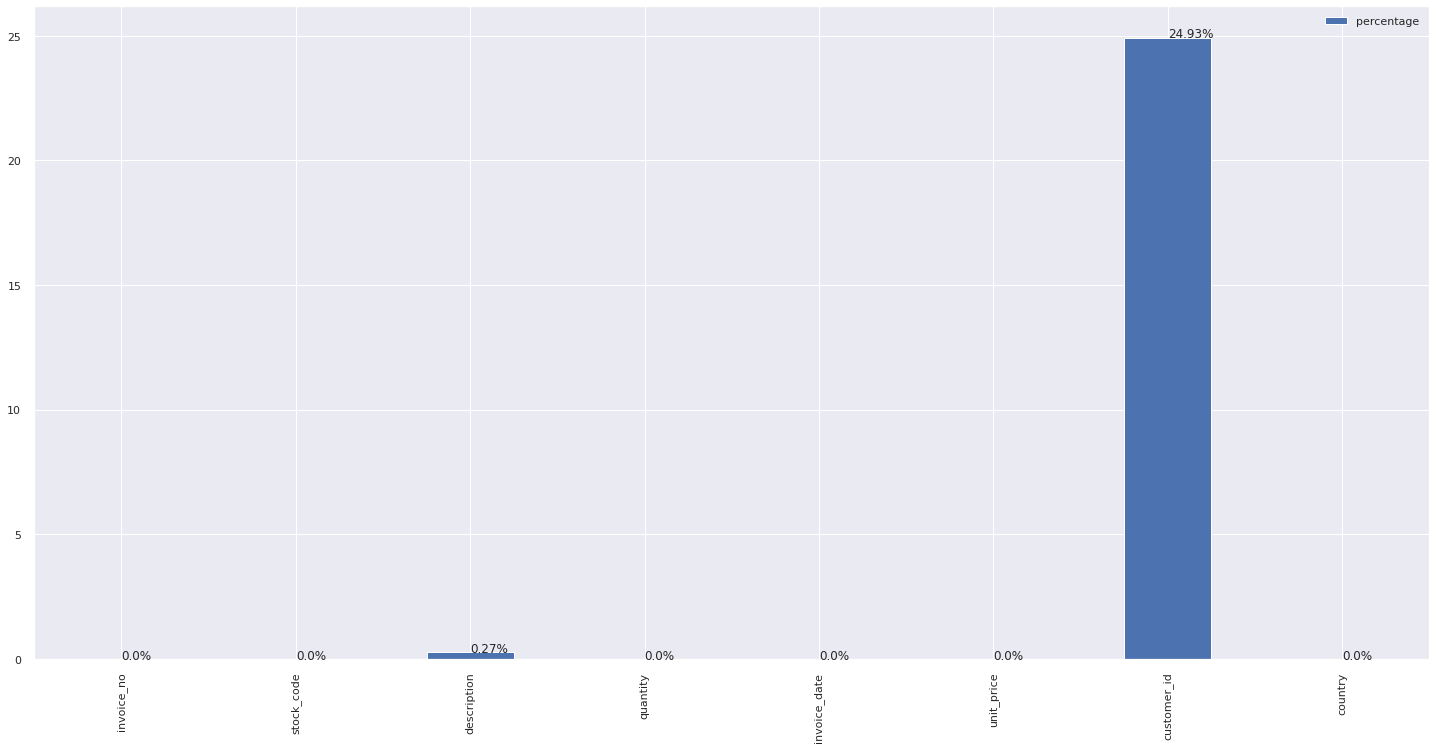

In [19]:
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate( missing_percentage ):
    barchart.text( index, percentage, str(percentage)+'%')

## Fillout NA

In [20]:
# separate NA's in two different dataframe, one with na and other without it
df_missing = df0.loc[df0['customer_id'].isna(), :]
df_not_missing = df0.loc[~df0['customer_id'].isna(), :]

In [21]:
df_missing.shape

(135080, 8)

In [22]:
df_not_missing.shape

(406829, 8)

In [23]:
df_not_missing['customer_id'].max()

## Fillout NA stratety, creating customers_id to keep their behavior (25% of the database)

18287.0

In [24]:
# create reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates().copy() )
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup ), 1) # Fillout NA stratety: creating customers_id to keep their behavior (25% of the database)

# merge original with reference dataframe
df0 = pd.merge( df0, df_backup, on='invoice_no', how='left' )

# coalesce 
df0['customer_id'] = df0['customer_id_x'].combine_first( df0['customer_id_y'] )

# drop extra columns
df0 = df0.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [25]:
df0.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## Change Types

In [26]:
df0['customer_id'] = df0['customer_id'].astype('int64')

In [26]:
df0.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## Descriptive Statistics

In [27]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
unit_price,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
customer_id,541909.0,16688.840453,2911.411352,12346.00,14367.00,16249.00,18283.00,22709.0


In [28]:
num_attributes = df0.select_dtypes(include = number)
cat_attributes = df0.select_dtypes(exclude = [number, np.datetime64])

### Numerical Attributes

In [29]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana','std', 'skew','kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


**Num Attributes Investigating**:

    1. Quantity negativa (pode ser devolução?)
    2. Preço unitário igual a zero e negativo(pode ser promoção?)

### Categorical Attributes

In [30]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [31]:
# procurar linhas que tenham letras no invoice_no
#cat_attributes.loc[cat_attributes['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x )))]


#### Invoice_No

In [31]:
# problem: We got letters and numbers in invoice_no
#df1['invoice_no'].astype( int )

# identification: 
df_letter_invoices = df0.loc[df0['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices.head()

print( 'Total number of invoices: {}'.format( len( df_letter_invoices ) ) )
print( 'Total number of negative quantity: {}'.format( len( df_letter_invoices[ df_letter_invoices['quantity'] < 0 ] ) ) )

Total number of invoices: 9291
Total number of negative quantity: 9288


#### Stock_Code

In [32]:
# check stock codes only characters
df0.loc[df0['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

# Acão:
## 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### Description

In [33]:
df0.head()

# Action: Delete description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


#### Country

In [34]:
df0['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [35]:
# purchases per country (percentage)
df0['country'].value_counts( normalize=True)*100

United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United Arab Em

In [37]:
# customers per country
df0[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().sort_values( 'customer_id', ascending=False)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


# VARIABLE FILTERING

In [39]:
df1 = df0.copy()

In [40]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [ ]:
# df1[df1['unit_price'] > 0]

In [ ]:
# df1.loc[ df1['unit_price'] > 0.0 ,['customer_id', 'descriptino', 'unit_price']].sort_values('unit_price', ascending = True).head()

In [ ]:
# df1[['customer', 'description', 'unit_price']]

In [41]:
 # === Numerical attributes ====
df1 = df1.loc[df1['unit_price'] >= 0.04, :]

# === Categorical attributes ====
df1 = df1[~df1['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
                                    'DCGSSGIRL', 'PADS', 'B', 'CRUK'] )]

# description
df1 = df1.drop( columns='description', axis=1 )

# country 
df1 = df1[~df1['country'].isin( ['European Community', 'Unspecified' ] ) ] #assuming this risk so we can use lat long parameters

# quantity 
df1_returns = df1.loc[df1['quantity'] < 0, :].copy()
df1_purchases = df1.loc[df1['quantity'] >= 0, :].copy()

# FEATURE ENGINEERING

In [ ]:
 # Feature Ideas:
## Moving Average - 7d, 14d, 30d
## Quantidade de Compras por mês, antes do dia 15 e depois do dia 15
## Average Financial
## Basket Size * Price - Quantidade de preços por cesta


In [42]:
df2 = df1.copy()

## Feature Creation

In [44]:
df2.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


In [45]:
# data reference
# RFM Model, creating feature for it

df_ref = df2.drop(['invoice_no', 'stock_code',
                   'quantity', 'invoice_date', 'unit_price',
                   'country'], axis = 1).drop_duplicates(ignore_index = True).copy()
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


### Gross Revenue

In [46]:
# Gross Revenue ( Faturamento ) quantity * price
df1_purchases.loc[:, 'gross_revenue'] = df1_purchases.loc[:,'quantity'] * df1_purchases.loc[:, 'unit_price']

# Monetary (How much money a customer spends on purchases)
df_monetary = df1_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### Recency

In [51]:
# Recency - Day from last purchase
df_recency = df1_purchases.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df1['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()

df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### Quantity of Purchases

In [52]:
# Quantity of purchases (quantity of invoice no)
df_freq = (df1_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename(columns = {'invoice_no': 'qty_invoice_no'}))
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
dtype: int64

### Quantity of Items Purchased by Customer

In [53]:
# Quantity of items purchased by customer
df_freq = (df1_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qty_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
dtype: int64

### Quantity of Products Purchased

In [54]:
# Quantity of unique products purchased (Frequency: qntd of products over time)

# Number of products (different stock codes by customer)
df_freq = (df1_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qty_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
dtype: int64

### Average Ticket Value

In [55]:
# Average Ticket Value
df_avg_ticket = df1_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
avg_ticket        91
dtype: int64

In [56]:
df_avg_ticket.head()

,customer_id,avg_ticket
0,12346,77183.600000
1,12347,23.681319
2,12348,53.231111
3,12349,20.243750
4,12350,18.400000


In [57]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000


### Average Recency Days

In [58]:
# Average recency days
df_aux = df1[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

#average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qty_invoice_no        91
qty_items             91
qty_products          91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### Frequency

In [59]:
#Frequency Purchase (rate: purchases by day)
df_aux = ( df1_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qty_invoice_no        91
qty_items             91
qty_products          91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

### Number of Returns

In [60]:
#Number of Returns
df_returns = df1_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0 #customers with 0 returned items

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qty_invoice_no        91
qty_items             91
qty_products          91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
dtype: int64

### Basket Size

In [61]:
#Basket Size - the number of products sold in a single purchase ( Quantity )
# Invoice No = Purchase = purchase
# Stock Code = Produto Único = Product
# Quantity = Item = Item

df_aux = ( df1_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qty_invoice_no        91
qty_items             91
qty_products          91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

### Unique Basket Size

In [62]:
#Unique Basket Size - Quantidade de produtos distintos por compra

df_aux = ( df1_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'count' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qty_invoice_no              91
qty_items                   91
qty_products                91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [63]:
 df_ref.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,8.735294
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,19.000000
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,15.466667
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,5.600000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,1.000000


# EXPLORATORY DATA ANALYSIS (EDA)

    1) fazer analises para validar hipoteses de negócios, combater achismos do negócio

    2) estudar o espaço de dados, espaço em que os dados estão inseridos.

In [64]:
df3 = df_ref.dropna().copy()
df3.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qty_invoice_no            0
qty_items                 0
qty_products              0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## Univariate Analysis

**Notes**
#O tipo de cluster vai variar de acordo com o problema de negócio;

What are we looking for in a clustering problem?

1. Cluesters coesos e separados;
2. Métricas que indicam variabilidade:
    - Min, max, range (dispersion)
    - Mean, median
    - Standard Deviation and Variance
    - Coefficient of variation (CV)


In [61]:
profile = ProfileReport( df3 )
profile.to_file( 'output_v1.html' )

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

file:///home/marxcerqueira/repos/Data-Science-Projects/pa005_insiders_clustering/pa005_marx_cerqueira/notebooks/output_v1.html

### Gross Revenue

In [65]:
df3[df3['gross_revenue'] == 279138.01999999984]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.20339,288.0,2733.944444,28.611111


In [66]:
 df3.sort_values( 'gross_revenue', ascending=False ).head(10)

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.203390,288.0,2733.944444,28.611111
492,18102,259657.30,0.0,60.0,64124.0,431.0,602.453132,14.680000,0.163043,0.0,1068.733333,7.183333
433,17450,194550.79,8.0,46.0,69993.0,337.0,577.302047,12.821429,0.127778,952.0,1521.586957,7.326087
3338,16446,168472.50,0.0,2.0,80997.0,3.0,56157.500000,205.000000,0.009709,80995.0,40498.500000,1.500000
66,14911,140450.72,1.0,199.0,80263.0,5673.0,24.757751,2.601399,0.533512,3332.0,403.331658,28.507538
1150,12415,124564.53,24.0,20.0,77373.0,713.0,174.704811,20.866667,0.063694,427.0,3868.650000,35.650000
190,14156,117379.63,9.0,55.0,57885.0,1400.0,83.842593,7.260000,0.151515,859.0,1052.454545,25.454545
15,17511,91062.38,2.0,31.0,64549.0,963.0,94.561142,11.593750,0.083333,1535.0,2082.225806,31.064516
12,16029,72882.09,38.0,62.0,40207.0,241.0,302.415311,9.054054,0.184524,8004.0,648.500000,3.887097
955,16684,66653.56,4.0,28.0,50255.0,277.0,240.626570,22.125000,0.078873,864.0,1794.821429,9.892857


In [67]:
df2[df2['customer_id'] == 14646].head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646
37957,539491,20751,1,2016-12-18,2.10,Netherlands,14646
37958,539491,21246,2,2016-12-18,4.95,Netherlands,14646
37959,539491,22960,1,2016-12-18,4.25,Netherlands,14646
37960,539491,22355,2,2016-12-18,0.85,Netherlands,14646
37961,539491,21123,2,2016-12-18,1.25,Netherlands,14646


In [66]:
np.sum( df2.loc[df2['customer_id'] == 14646, 'quantity'] * df2.loc[df2['customer_id'] == 14646, 'unit_price'] )   

278778.02

In [67]:
 df2.loc[df2['customer_id'] == 14646, 'quantity'].sum()

196556

### Qty Products

In [68]:
df3[df3['qty_products']== 7838]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,3.321429,0.33244,203.0,185.91129,63.209677


### Avg Ticket

In [69]:
df3[df3['avg_ticket']== 56157.5]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
3338,16446,168472.5,0.0,2.0,80997.0,3.0,56157.5,205.0,0.009709,80995.0,40498.5,1.5


In [70]:
df2[df2['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,1,2017-05-16,1.65,United Kingdom,16446
194355,553573,22982,1,2017-05-16,1.25,United Kingdom,16446
540421,581483,23843,80995,2017-12-07,2.08,United Kingdom,16446
540422,C581484,23843,-80995,2017-12-07,2.08,United Kingdom,16446


## Bivariate Analysis

## Multivariate Analysis

# DATA PREPARATION

In [ ]:
df4 = df3.copy()

In [ ]:
df4.head()

## Feature Normalization

## Feature Rescaling

In [ ]:
## Standard Scalaer
ss = pp.StandardScaler()

df4['gross_revenue'] = ss.fit_transform( df4[['gross_revenue']] )
df4['recency_days'] = ss.fit_transform( df4[['recency_days']] )
df4['invoice_no'] = ss.fit_transform( df4[['invoice_no']] )
df4['avg_ticket'] = ss.fit_transform( df4[['avg_ticket']] )

In [ ]:
df4.head()

## Feature Transformation

### Enconding

### Target Variable Transformation

### Nature Transformation

# FEATURE SELECTION

In [ ]:
df5 = df4.copy()

# HYPERPARAMETER FINE-TUNNING

In [ ]:
## clusterização é obrigado a fazer Rescaling para que as variáveis tenham o mesmo tamanho.
## Assistir live PCA

In [ ]:
df6 = df5.copy()

In [ ]:
X = df6.drop('customer_id', axis = 1)

In [ ]:
X.head()

## Whitin-Cluster Sum of Square (WSS)

In [ ]:
clusters = [2, 3, 4, 5, 6, 7]

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit(X)
kmeans.show();
# quero clusters condensados (distancia do centroide e pontos no mesmo cluster pequena) e espaçados (distancia entre centroides de clusters alta). ONde consigo? Onde há maior variação (elbow)

## Sillhouette Score

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans.fit(X)
kmeans.show();

### Silhouette Analysis

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (25, 18))

for k  in clusters:
    km = c.KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, random_state = 42)
    #truque: divisão com moda (para visualizacao)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize();

. Silhueta bem ruim a priore, o cluster maior está absorvendo os menores, se sobressaindo.

. Apenas com essas features criadas

ainda não fizemos extração dos prod retornados, dados bagunçados q podem estar confundindo o algoritmo, nao fizemos rescala para uma comparação mais justa das features, nao criamos novas features

. series temporais e clusterização é mais fácil fazer em R, há funções bem otimizadas já.

# MACHINE LEARNING MODEL TRAINING

## K-Means

In [ ]:
# model definition
k = 3;
kmeans = c.KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## Cluster Validation

In [ ]:
# WSS (Within-cluster Sum of Square )
print('WSS score: {}'.format(kmeans.inertia_))

# SS (Silhouette Score)
print('SS score: {}'.format(m.silhouette_score(X, labels, metric = 'euclidean')))

## Compare Model's Performance

# CLUSTER ANALYSIS

In [ ]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

## Visualization Inspection

In [ ]:
# # apenas para 3 features
# fig = px.scatter_3d(df9, x = 'recency_days', y = 'purchase_frequency', z = 'gross_revenue', color = 'cluster')
# fig.show();

In [ ]:
visualizer = SilhouetteVisualizer(kmeans, colores = 'yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 2D plot

In [ ]:
df_viz = df9.drop(columns = 'customer_id', axis = 1)
sns.pairplot(df_viz, hue = 'cluster')

## UMAP - t-SNE

**Machine Learning - Manifold (aprendizado por topologia)**

PCA - Matrix, Espaço de Distâncias - Espaço Hilbert - 9 condições para cumprir - Colorários (garantia para que a distancia naquele espaço funciona

UMAP, t-SNE (2009) - Manifold - Topologia

### UMAP

funciona muito bem quando temos grande volume de dados, mais rápido.
t-SNE para poucos dados é mais rápido

In [ ]:
reducer = umap.UMAP(n_neighbors = 90 ,random_state = 42)
embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_viz['embedding_X'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                hue = 'cluster',
                palette = sns.color_palette('hls', n_colors = len(df_viz['cluster'].unique())),
                data = df_viz);


## Cluster Profile

Where we do an analysis of the clusters

In [ ]:
df9.head()

In [ ]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

# Avg invoice_no
df_invoice_no = df9[['invoice_no', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_invoice_no, how='inner', on='cluster' )

# Avg Ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster

In [ ]:
df_cluster['gross_revenue_percentage'] = (df_cluster['gross_revenue']/df_cluster['gross_revenue'].sum())*100
df_cluster['recency_percentage'] = (df_cluster['recency_days']/df_cluster['recency_days'].sum())*100
df_cluster['frequency_percentage'] = (df_cluster['purchase_frequency']/df_cluster['purchase_frequency'].sum())*100

df_cluster

Cluster 01:

- Number of customers: 6 (0.14% of costumers)
- Recency Average: 7 days (6.36%)
- Purchase Average: 89 purchases
- Gross Revenue Average: $182,181.89 

Cluster 02:

- Number of customers: 31 (0.7% of costumers)
- Recency Average: 14 days
- Purchase Average: 53 purchases
- Gross Revenue Average: $40.543,51

Cluster 03:

- Number of customers: 4335 (99.15% of costumers)
- Recency Average: 92 days
- Purchase Average: 5 purchases
- Gross Revenue Average: $1.372,58

# MODEL DEPLOYMENT